<a href="https://colab.research.google.com/github/5h33p/student_habits/blob/main/Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git init
! git remote set-url --push git@github.com:5h33p/student_habits.git
# ! git add .
# ! git commit -m "Initial commit"

! git branch -M main
! git push -u origin main

Reinitialized existing Git repository in /content/.git/
usage: git remote set-url [--push] <name> <newurl> [<oldurl>]
   or: git remote set-url --add <name> <newurl>
   or: git remote set-url --delete <name> <url>

    --push                manipulate push URLs
    --add                 add URL
    --delete              delete URLs

git: 'credential-wincred' is not a git command. See 'git --help'.
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
! git status -all

In [ ]:
! git remote show origin -n
! git push origin main

* remote origin
  Fetch URL: https://github.com/5h33p/student_habits.git
  Push  URL: https://github.com/5h33p/student_habits.git
  HEAD branch: (not queried)
  Local ref configured for 'git push' (status not queried):
    (matching) pushes to (matching)
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
! git remote add origin https://github.com/5h33p/student_habits.git
! git branch -M main
! git push -u origin main

error: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address


# Importing Dependencies

In [ ]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression, SGDClassifier, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# Getting Data

In [ ]:
# Download latest version
path = kagglehub.dataset_download("aryan208/student-habits-and-academic-performance-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.86M/2.86M [00:00<00:00, 129MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aryan208/student-habits-and-academic-performance-dataset/versions/1


In [ ]:
data = pd.read_csv(path + "/enhanced_student_habits_performance_dataset/enhanced_student_habits_performance_dataset.csv")
data.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


In [ ]:
# data[data.notna()==False].sum() # There are no null values

print(data.columns)

Index(['student_id', 'age', 'gender', 'major', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'previous_gpa',
       'semester', 'stress_level', 'dropout_risk', 'social_activity',
       'screen_time', 'study_environment', 'access_to_tutoring',
       'family_income_range', 'parental_support_level', 'motivation_level',
       'exam_anxiety_score', 'learning_style', 'time_management_score',
       'exam_score'],
      dtype='object')


# Exploratory Analysis

## Anxiety Score

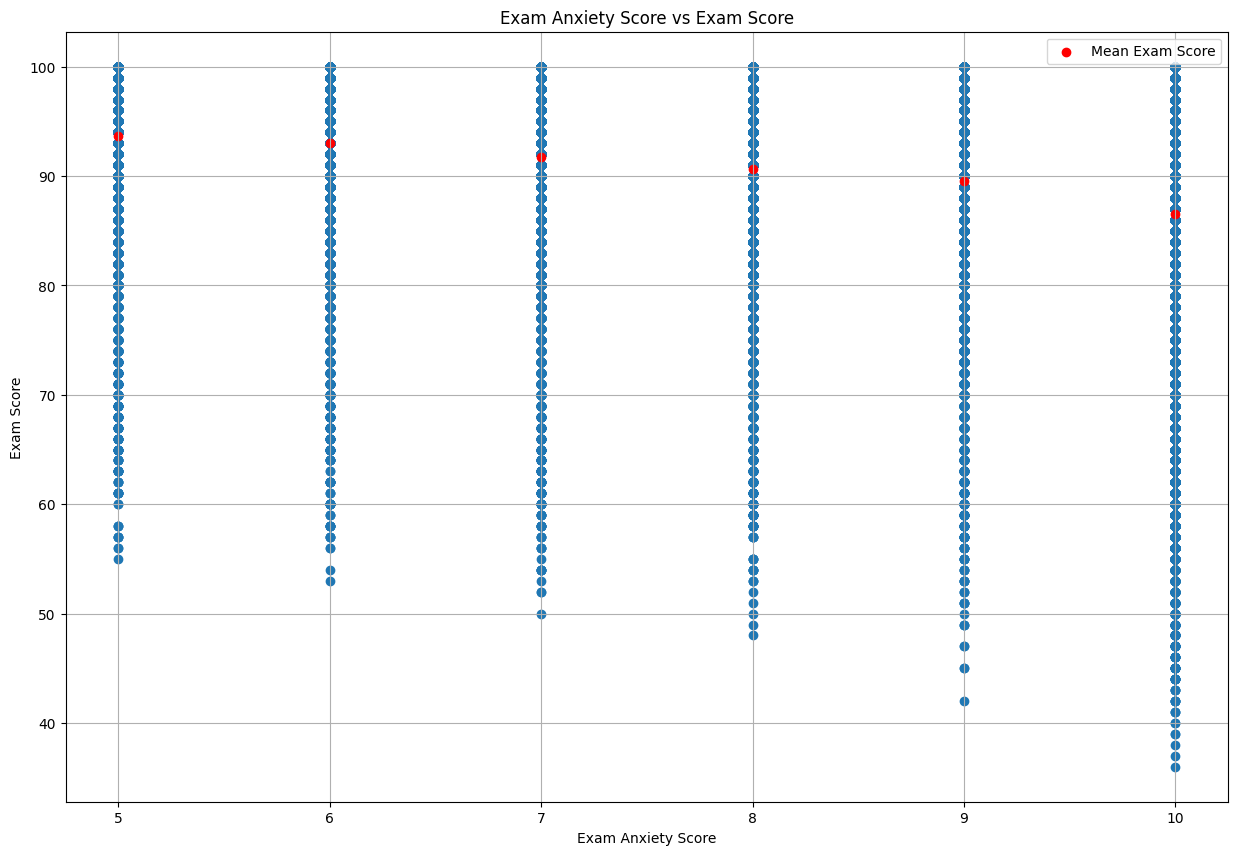

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(data.exam_anxiety_score, data.exam_score)
plt.title("Exam Anxiety Score vs Exam Score")

score_anxiety = data.groupby(by='exam_anxiety_score').exam_score.mean().copy()

plt.scatter(score_anxiety.index, score_anxiety, marker='o', color='r', label='Mean Exam Score')
plt.grid(True)
plt.legend()
plt.xlabel("Exam Anxiety Score")
plt.ylabel("Exam Score")
plt.show()

## Stress Level

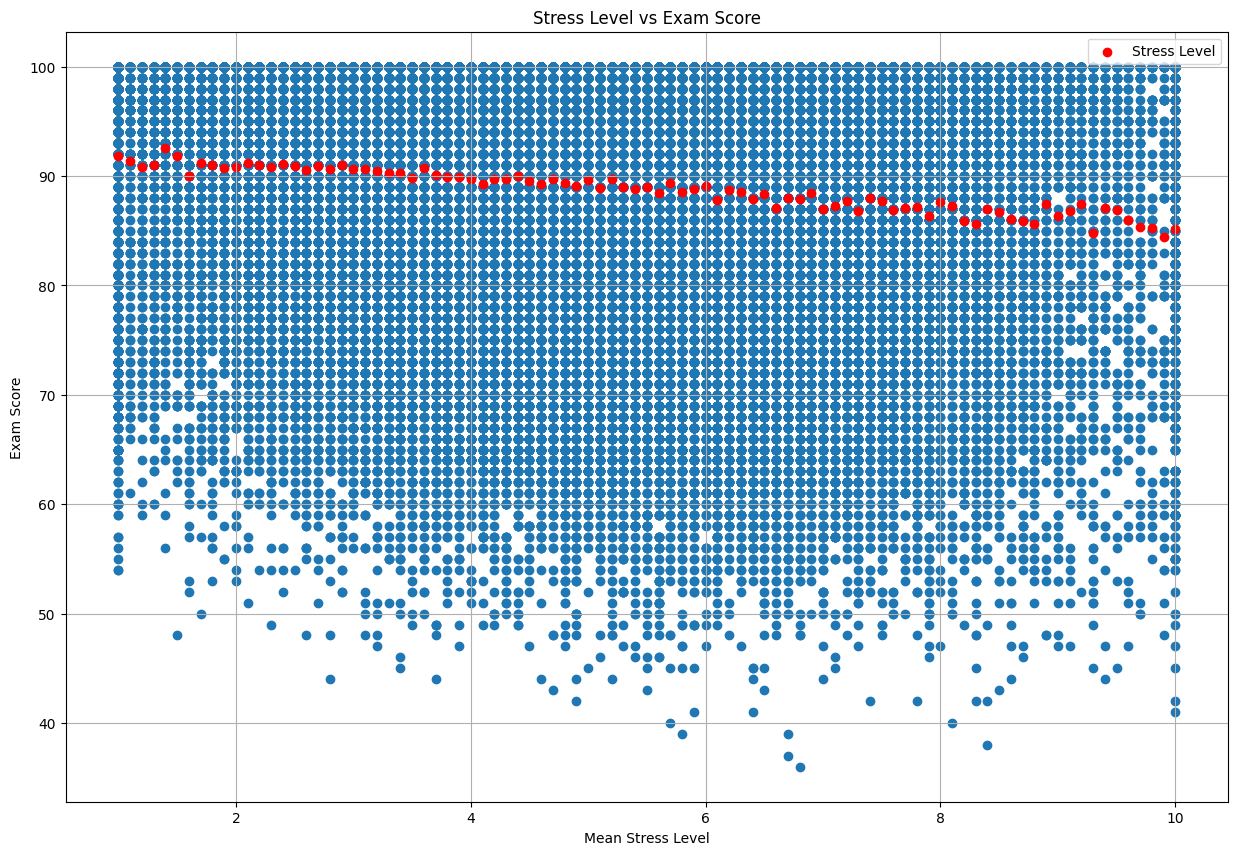

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(data.stress_level, data.exam_score)
plt.title("Stress Level vs Exam Score")

stress_level = data.groupby(by='stress_level').exam_score.mean().copy()

plt.scatter(stress_level.index, stress_level, marker='o', color='r', label='Stress Level')
plt.grid(True)
plt.legend()
plt.xlabel("Mean Stress Level")
plt.ylabel("Exam Score")
plt.show()

## Sleep Hours

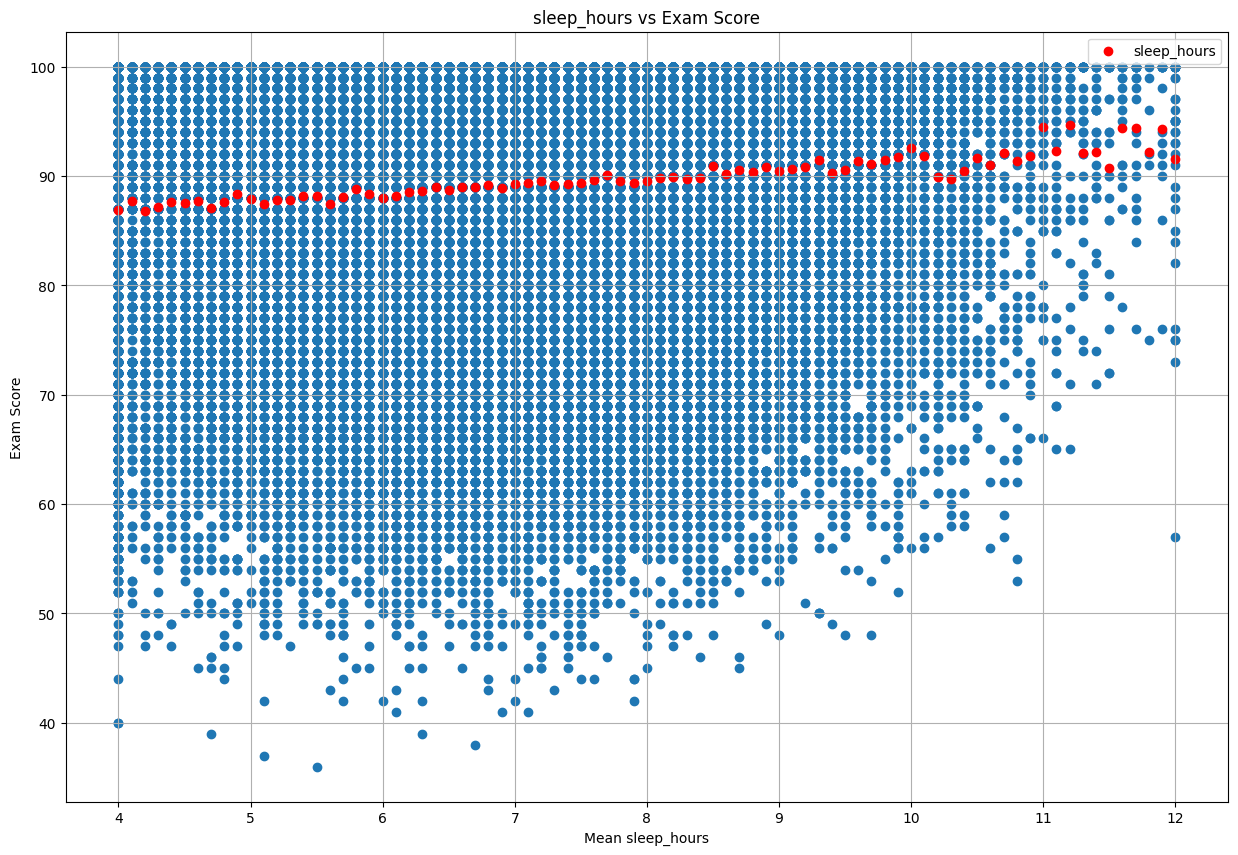

In [ ]:
df_column = 'sleep_hours'

plt.figure(figsize=(15, 10))
plt.scatter(data[df_column], data.exam_score)
plt.title(f"{df_column} vs Exam Score")

plot_data = data.groupby(by=df_column).exam_score.mean().copy()

plt.scatter(plot_data.index, plot_data, marker='o', color='r', label=f'Mean {df_column}')
plt.grid(True)
plt.legend()
plt.xlabel(f"{df_column}")
plt.ylabel("Exam Score")
plt.show()

## Screen Time

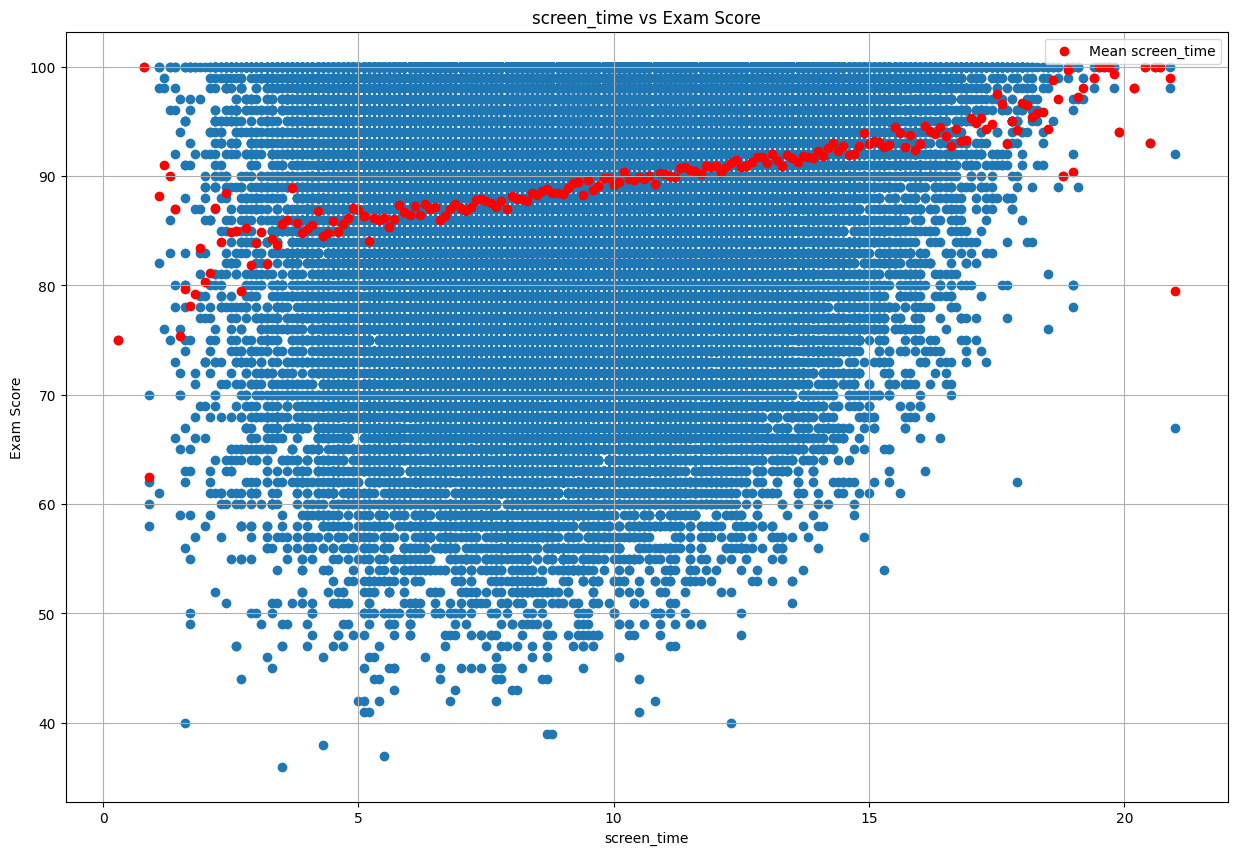

In [ ]:
df_column = 'screen_time'

plt.figure(figsize=(15, 10))
plt.scatter(data[df_column], data.exam_score)
plt.title(f"{df_column} vs Exam Score")

plot_data = data.groupby(by=df_column).exam_score.mean().copy()

plt.scatter(plot_data.index, plot_data, marker='o', color='r', label=f'Mean {df_column}')
plt.grid(True)
plt.legend()
plt.xlabel(f"{df_column}")
plt.ylabel("Exam Score")
plt.show()

## Motivation Level

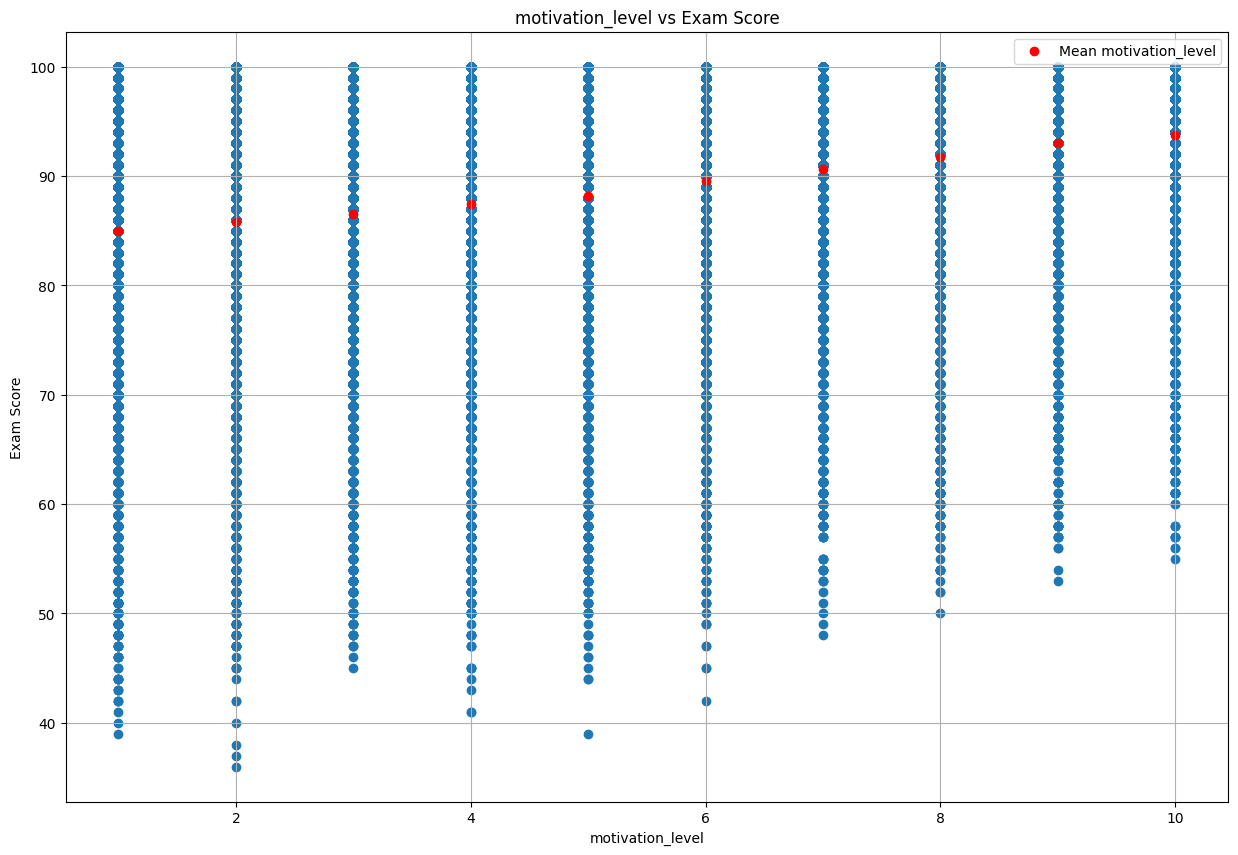

In [ ]:
df_column = 'motivation_level'

plt.figure(figsize=(15, 10))
plt.scatter(data[df_column], data.exam_score)
plt.title(f"{df_column} vs Exam Score")

plot_data = data.groupby(by=df_column).exam_score.mean().copy()

plt.scatter(plot_data.index, plot_data, marker='o', color='r', label=f'Mean {df_column}')
plt.grid(True)
plt.legend()
plt.xlabel(f"{df_column}")
plt.ylabel("Exam Score")
plt.show()

## Cutted Study Hours Per Day

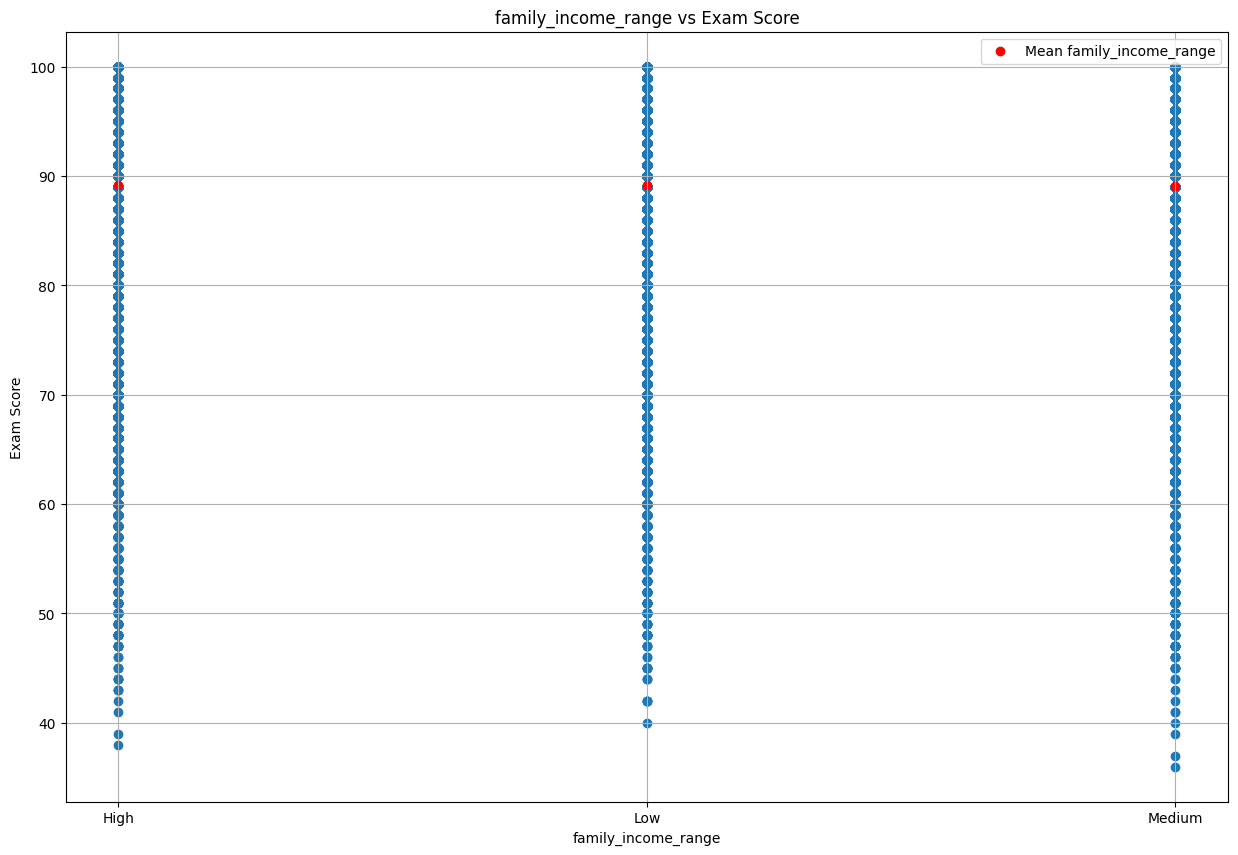

In [ ]:
df_column = 'family_income_range'

data['study_hours_per_day'] = pd.cut(data.study_hours_per_day, bins=10, labels=np.arange(10))


plt.figure(figsize=(15, 10))
plt.scatter(data[df_column], data.exam_score)
plt.title(f"{df_column} vs Exam Score")

plot_data = data.groupby(by=df_column).exam_score.mean().copy()

plt.scatter(plot_data.index, plot_data, marker='o', color='r', label=f'Mean {df_column}')
plt.grid(True)
plt.legend()
plt.xlabel(f"{df_column}")
plt.ylabel("Exam Score")
plt.show()

## Cutted Attendance Percentage

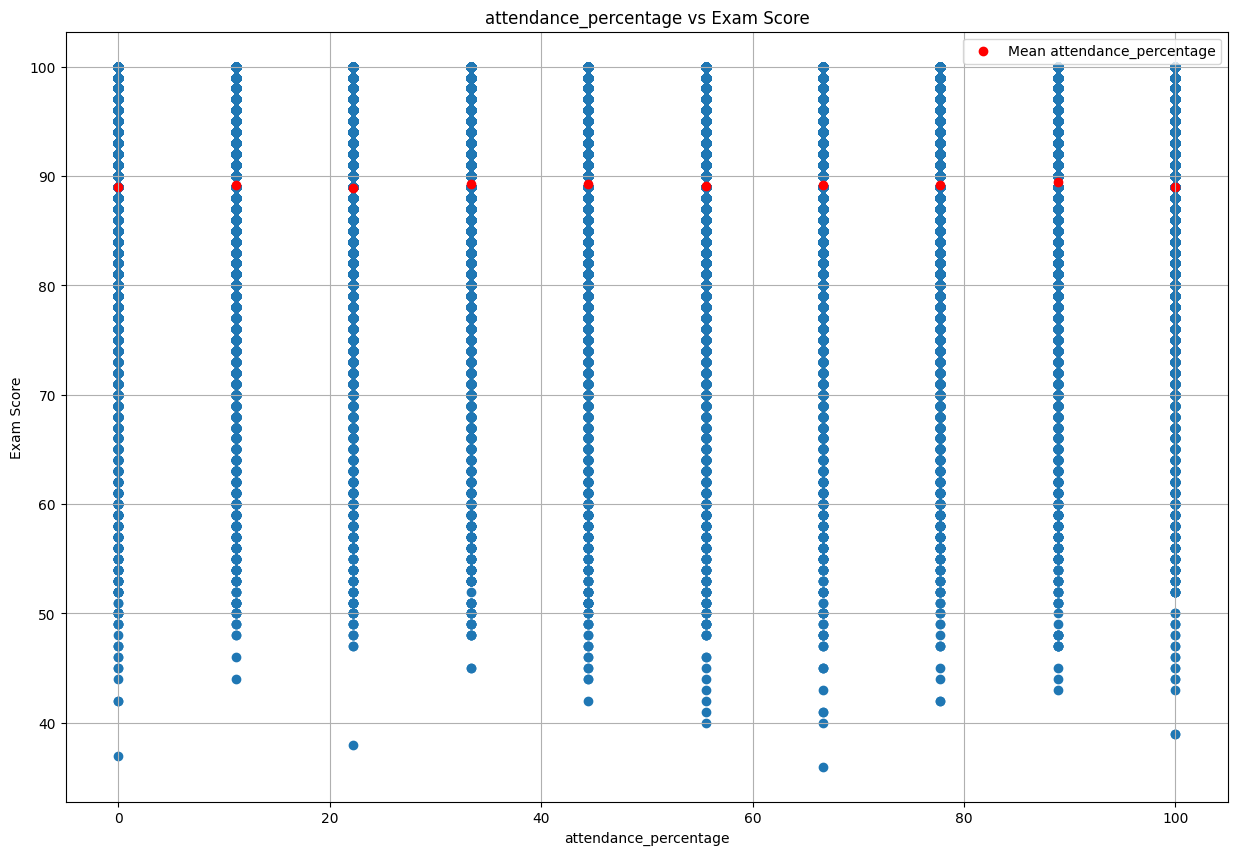

In [ ]:
df_column = 'attendance_percentage'

data.attendance_percentage = pd.cut(data.attendance_percentage, bins=10, labels=np.linspace(0, 100, 10))

plt.figure(figsize=(15, 10))
plt.scatter(data[df_column], data.exam_score)
plt.title(f"{df_column} vs Exam Score")

plot_data = data.groupby(by=df_column).exam_score.mean().copy()

plt.scatter(plot_data.index, plot_data, marker='o', color='r', label=f'Mean {df_column}')
plt.grid(True)
plt.legend()
plt.xlabel(f"{df_column}")
plt.ylabel("Exam Score")
plt.show()

# Preprocessing

In [ ]:


print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   student_id                     80000 non-null  int64   
 1   age                            80000 non-null  int64   
 2   gender                         80000 non-null  object  
 3   major                          80000 non-null  object  
 4   study_hours_per_day            80000 non-null  category
 5   social_media_hours             80000 non-null  float64 
 6   netflix_hours                  80000 non-null  float64 
 7   part_time_job                  80000 non-null  object  
 8   attendance_percentage          80000 non-null  category
 9   sleep_hours                    80000 non-null  float64 
 10  diet_quality                   80000 non-null  object  
 11  exercise_frequency             80000 non-null  int64   
 12  parental_education_level       8